# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### 1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

First, find the dimensions of training set, validation set and testing set.
Second, explore the dimensions of the image 

In [2]:
import numpy as np 


# TODO: Number of training examples
n_train = np.size(X_train, 0)

# TODO: Number of validation examples
n_validation = np.size(X_valid, 0)

# TODO: Number of testing examples.
n_test = np.size(X_test, 0)



# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print('Data set type=',type(X_train))

Number of training examples = 34799
Number of testing examples = 12630
Number of validation = 4410
Image data shape = (32, 32, 3)
Number of classes = 43
Data set type= <class 'numpy.ndarray'>


### 2.Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

1. Pick a random image to show

Text(0.5,1,'Class distribution of validation set')

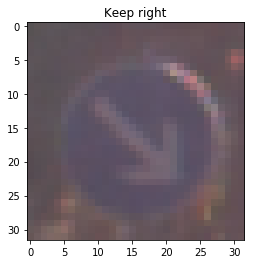

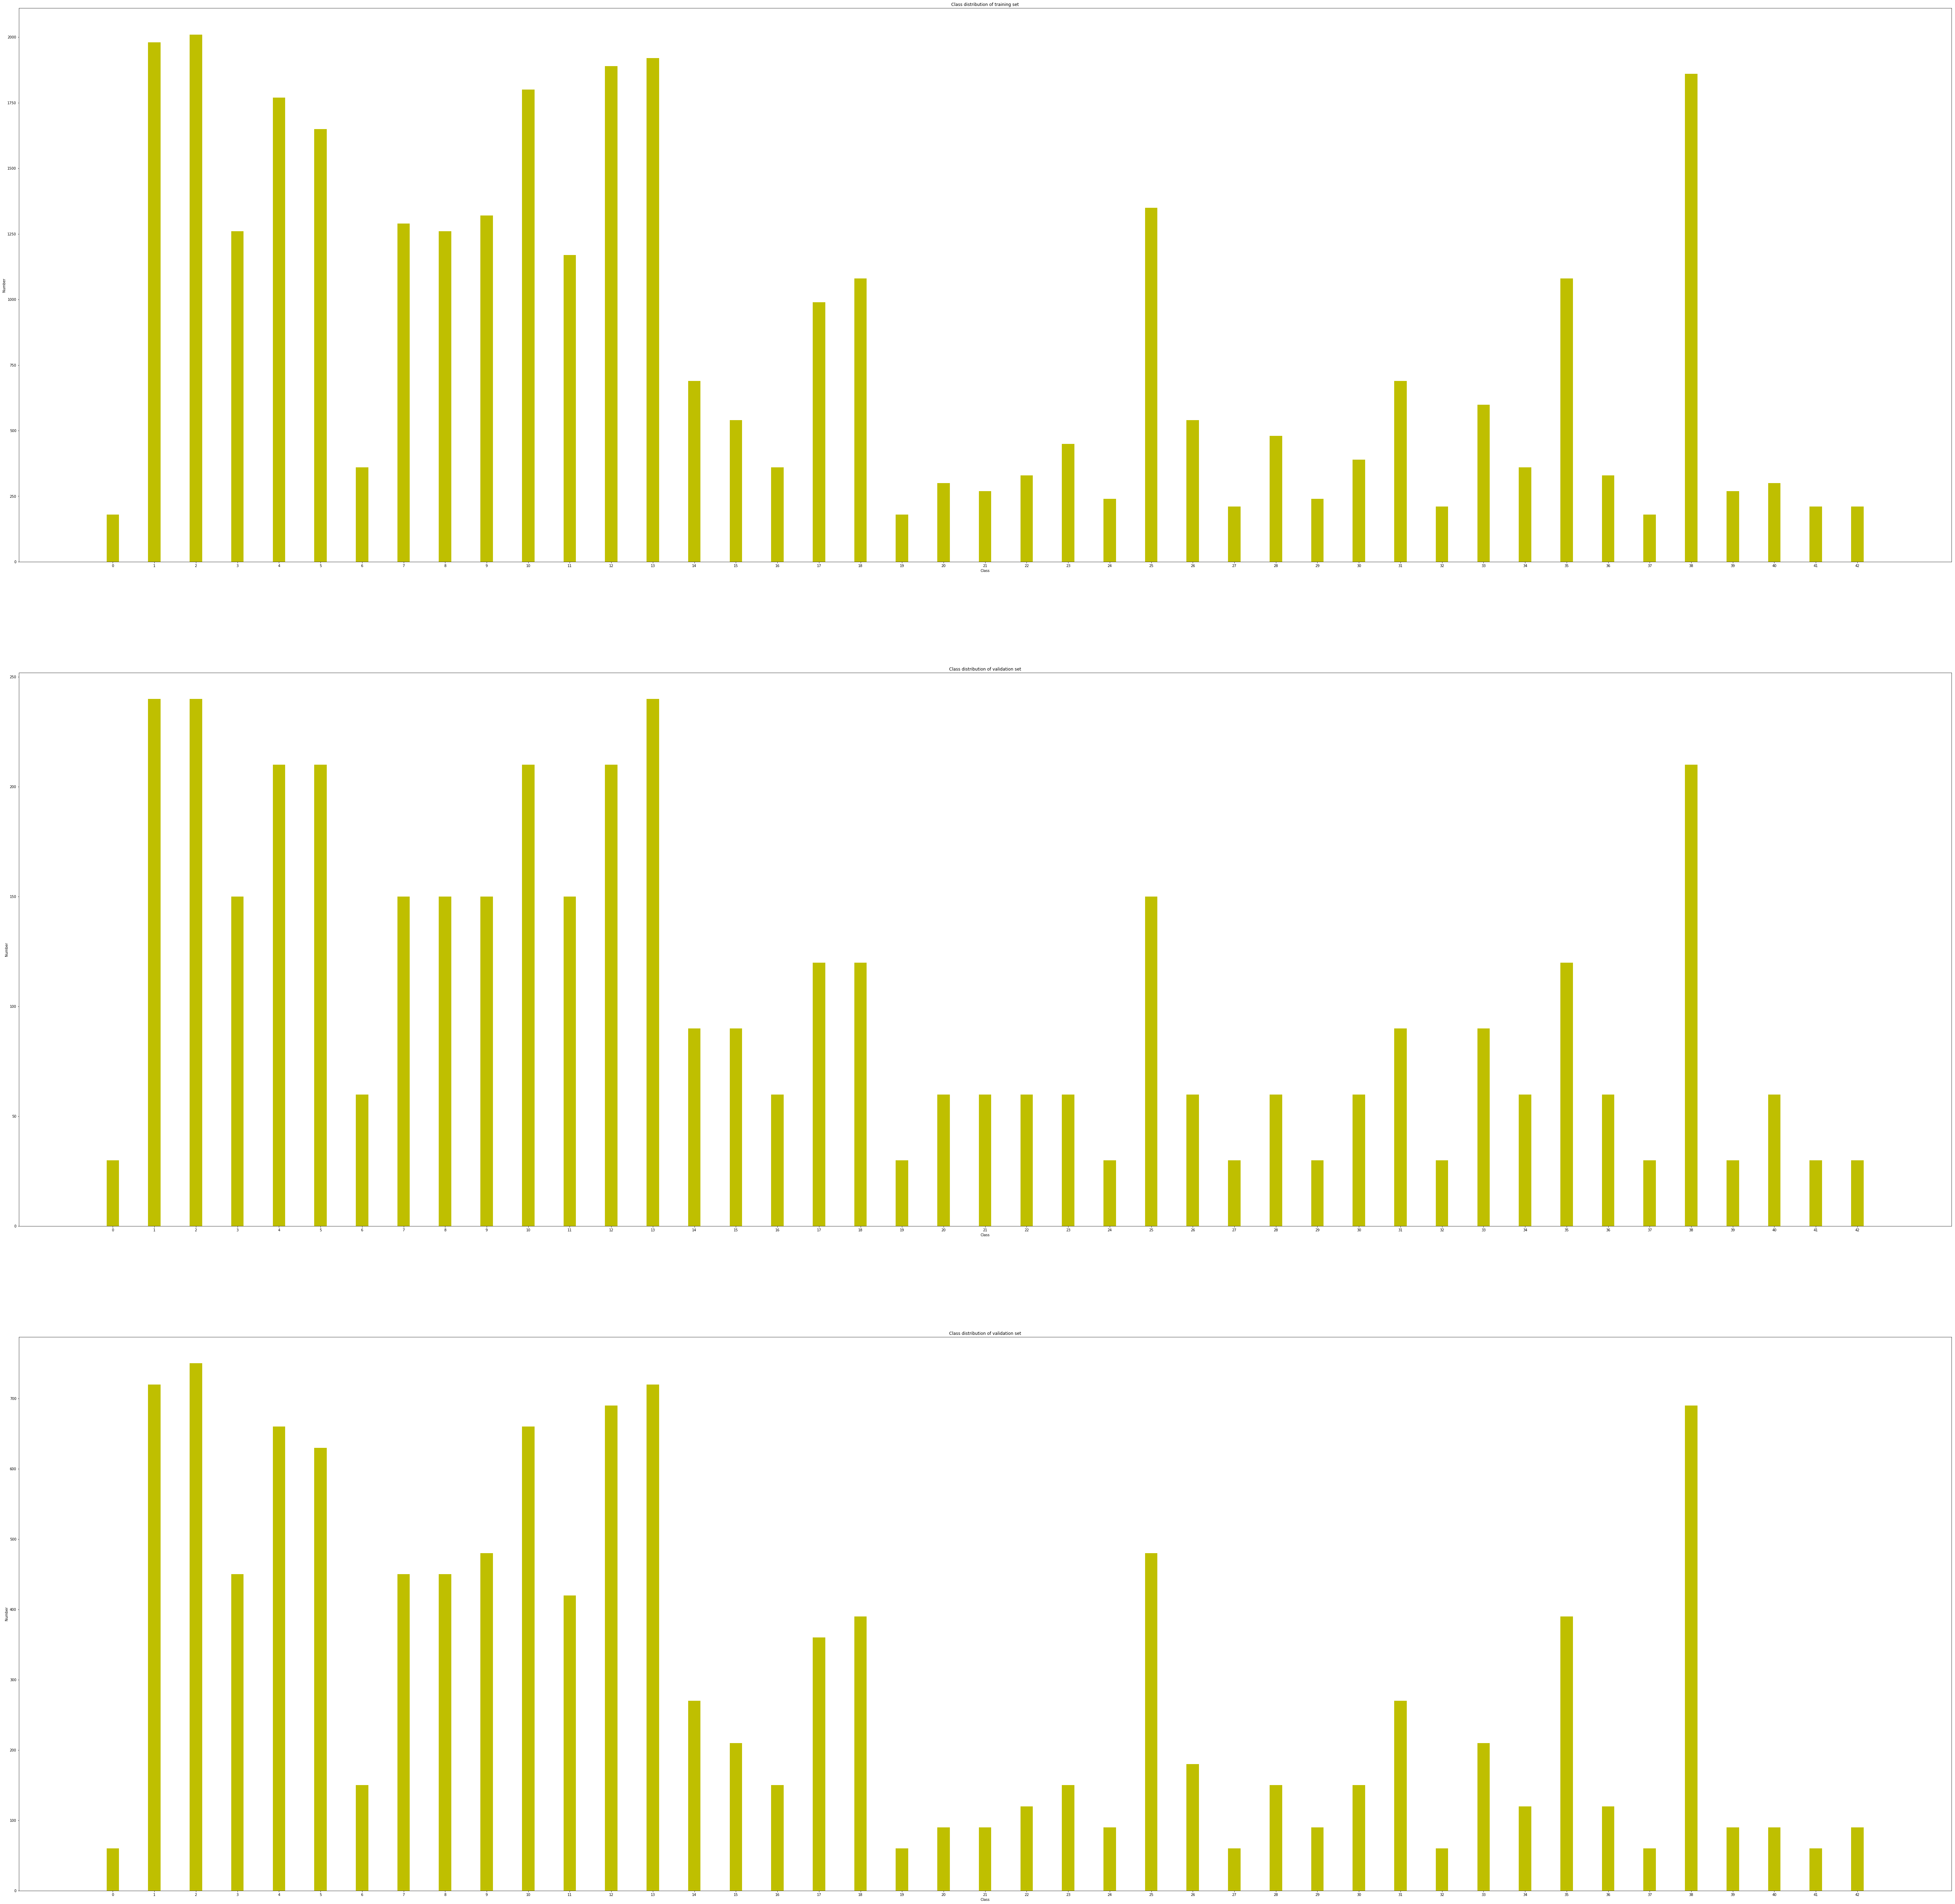

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the sign name set
sign_name = pd.read_csv('signnames.csv')


# Determine different numbers and their respective occurrences
Cnt = Counter(y_train)

# Visualizations will be shown in the notebook.
%matplotlib inline
num = np.random.randint(n_train)
picture = X_train[num]

plt.imshow(picture,cmap = 'gray')
plt.title(sign_name['SignName'][y_train[num]])

plt.figure(figsize = (99,99))
plt.subplot(3,1,1)
x_data = range(n_classes)
y_data = [Cnt[i] for i in x_data]
plt.bar(x_data , y_data, width=0.3 , color='y')
plt.xticks ([i for i in range(n_classes)])
plt.xlabel('Class')
plt.ylabel('Number')
plt.title('Class distribution of training set')


Cnt = Counter(y_valid)
plt.subplot(3,1,2)
x_data = range(n_classes)
y_data = [Cnt[i] for i in x_data]
plt.bar(x_data , y_data, width=0.3 , color='y')
plt.xticks ([i for i in range(n_classes)])
plt.xlabel('Class')
plt.ylabel('Number')
plt.title('Class distribution of validation set')


Cnt = Counter(y_test)
plt.subplot(3,1,3)
x_data = range(n_classes)
y_data = [Cnt[i] for i in x_data]
plt.bar(x_data , y_data, width=0.3 , color='y')
plt.xticks ([i for i in range(n_classes)])
plt.xlabel('Class')
plt.ylabel('Number')
plt.title('Class distribution of validation set')






----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
import cv2

# Normalize the data

def Normal(image):
    image_min = np.min(image)
    image_max = np.max(image)
    #image_min = 128
    #image_max = 256
    return (image- image_min)/(image_max-image_min)

# Grayscale the image

def Grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # expand dims from 32*32 to 32*32*1
    return np.expand_dims(gray_image,axis=2)


def Pre_process(set):
    after = []
    for image in set:
        process1 = Grayscale(image)
        after.append(process1)
    after = np.array(after)
    after = Normal(after)
    return after
def train_pre_process(img):
    process1 = Grayscale(img)
    process2 = np.array(process1)
    return Normal(process2)

def one_hot(x):
    ret = np.zeros((len(x),n_classes))
    for i, label in enumerate(x):
        ret[i][label] = 1
    return ret


In [5]:
from PIL import Image

def random_list(start,stop,length):
    random_list = []
    for i in range(length):
        random_list.append(np.random.randint(start, stop))
    return random_list

def rotate(image, angle, center=None, scale=1.0): 
    (h, w) = image.shape[:2] 
    if center is None: 
        center = (w // 2, h // 2) 

    M = cv2.getRotationMatrix2D(center, angle, scale) 

    rotated = cv2.warpAffine(image, M, (w, h)) 
    return rotated 

def salt(src,percentage):
    NoiseImg=src
    rows,cols,_=NoiseImg.shape
    NoiseNum=int(percentage*rows*cols)
    for i in range(NoiseNum):
        randX=np.random.randint(0,rows-1)
        randY=np.random.randint(0,cols-1)
        if np.random.randint(0,1)<=0.5:
            NoiseImg[randX,randY]=255
        else:
            NoiseImg[randX,randY]=NoiseImg[randX,randY]

    return NoiseImg


def augment_imgs(img):
    """
    Performs a set of augmentations with with a probability p
    """
    
    imgInfo = img.shape
    height= imgInfo[0]
    width = imgInfo[1]
    deep = imgInfo[2]
    
    
    matRotate = cv2.getRotationMatrix2D((height*0.5, width*0.5), 45, 1) 
    img_1 = cv2.warpAffine(img, matRotate, (height, width))
    
    crop_num = random_list(0,4,4)
    img_2 = img.copy()
    img_2[0:crop_num[0],:] = 0
    img_2[:,0:crop_num[2]] = 0
    img_2[height-crop_num[1]:height,:] = 0
    img_2[:,width - crop_num[3]:width] = 0
    
    img_3 = salt(img.copy(),0.01)
    
    return [img_1, img_2, img_3]


(32, 32, 3)


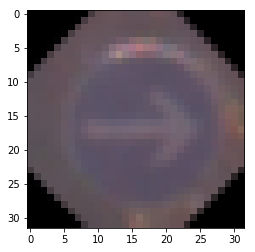

(32, 32, 3)


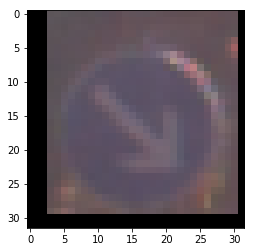

(32, 32, 3)


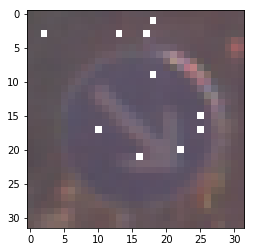

(32, 32, 3)


In [6]:
# Test image augment
eva = augment_imgs(picture)
eva = np.array(eva)
print(eva[0].shape)
for i in range(3):
    plt.imshow(eva[i])
    plt.show()
    print(eva[i].shape)


### Shuffle the training data


In [7]:
import tensorflow as tf
from sklearn.utils import shuffle
XX_train = np.ones((n_train*4,32,32,1))
yy_train = np.ones((n_train*4,1),int)
for i in range(n_train):
    
    new_image = augment_imgs(X_train[i])
    XX_train[(i-1)*4]   = train_pre_process(X_train[i])
    XX_train[(i-1)*4+1] = train_pre_process(new_image[0])
    XX_train[(i-1)*4+2] = train_pre_process(new_image[1])
    XX_train[(i-1)*4+3] = train_pre_process(new_image[2])
    
    yy_train[(i-1)*4]   = y_train[i]
    yy_train[(i-1)*4+1] = y_train[i]
    yy_train[(i-1)*4+2] = y_train[i]
    yy_train[(i-1)*4+3] = y_train[i]






In [8]:
X_train,y_train = shuffle(XX_train,yy_train)

X_train_1 = X_train
X_valid_1 = Pre_process(X_valid)
X_test_1 = Pre_process(X_test)
y_train_1 = one_hot(y_train)
y_valid_1 = one_hot(y_valid)
y_test_1 = one_hot(y_test)


image_shape = X_train_1.shape
label_shape = y_train_1.shape
print("Image data shape =", image_shape)
print("Label data shape =", label_shape)

Image data shape = (139196, 32, 32, 1)
Label data shape = (139196, 43)


### Model Architecture

In [9]:
from tensorflow.contrib.layers import flatten
# LeNet 

def LeNet(x):
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32*32*1. Output = 28*28*6.
    
    FW1 = tf.Variable(tf.truncated_normal(shape = (5,5,1,6), mean = mu, stddev = sigma))
    Fb1 = tf.Variable(tf.zeros(6))
    stides_1 = [1, 1, 1, 1]
    padding_1 = 'VALID'
    layer1 = tf.nn.conv2d(x, FW1, stides_1, padding_1) + Fb1
    
    # Batch normalization
    
    layer1 = tf.layers.batch_normalization(layer1)
    
    # Activation
    
    layer1 = tf.nn.relu(layer1)
    
    # Pooling, Input = 28*28*6, Output = 14*14*6.
    
    ksize_1p = [1, 2, 2, 1]
    strides_1p = [1, 2, 2, 1]
    padding_1p = 'VALID'
    conv_layer1 = tf.nn.max_pool(layer1, ksize_1p, strides_1p, padding_1p)
    
    # Layer 2: Convolutional. Input = 14*14*6. Output = 10*10*16
    
    FW2 = tf.Variable(tf.truncated_normal(shape = (5,5,6,16), mean = mu, stddev = sigma))
    Fb2 =tf.Variable(tf.zeros(16))
    stides_2 = [1, 1, 1, 1]
    padding_2 = 'VALID'
    layer2 = tf.nn.conv2d(conv_layer1, FW2, stides_2, padding_2) + Fb2
    
    # Batch normalization
    
    layer2 = tf.layers.batch_normalization(layer2)
    
    # Activation
    
    layer2 = tf.nn.relu(layer2)
    
    
    # Pooling. Input 10*10*16. Output 5*5*16
    
    ksize_2p = [1, 2, 2, 1]
    strides_2p = [1, 2, 2, 1]
    padding_2p = 'VALID'
    conv_layer2 = tf.nn.max_pool(layer2, ksize_2p, strides_2p, padding_2p)
    
    # Flatten. Input 5*5*16. Output 400
    
    fc0 = flatten(conv_layer2)
    
    # Layer3 : Fully connected. Input 400, Output 120
    
    fc1W = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    fc1b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0,fc1W) + fc1b
    
    # batch normalization
    fc1 = tf.layers.batch_normalization(fc1)
    
    # Activation
    
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    
    fc1 = tf.nn.dropout(fc1,0.7)
    
    # Layer 4: Fully Connected. Input 120. Output 84
    
    fc2_W = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Batch normalization
    fc2 = tf.layers.batch_normalization(fc2)
    
    # Activation 
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2,0.7)
    
    # Layer 5: Fully connected. Input 84. Output 43:
    
    fc3_W = tf.Variable(tf.truncated_normal(shape = (84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    fc3 = tf.matmul(fc2, fc3_W) + fc3_b
    
    return fc3



### Train, Validate and Test the Model

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32,1),name = 'x')
y = tf.placeholder(tf.int32, (None), name = 'y')


### Training Pipeline

In [11]:
rate = 0.001

logits = LeNet(x)
logits = tf.identity(logits,name = 'logits')
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


### Model Evalution

In [12]:
EPOCHS = 60
BATCH_SIZE = 128

correct_prediction = tf.equal(tf.argmax(logits,1),tf.argmax(y,1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction,tf.float32), name = 'accuracy')
saver = tf.train.Saver()

def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict = {x:batch_x, y: batch_y})
        total_accuracy += (accuracy*len(batch_x))
    
    return total_accuracy/num_examples

        


# Train the Model

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Training...')
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train_1, y_train_1)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate(X_valid_1, y_valid_1)
        training_accuracy = evaluate(X_train_1,y_train_1)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Taining Accuracy = {:.3f}".format(training_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.790
Taining Accuracy = 0.818
EPOCH 2 ...
Validation Accuracy = 0.848
Taining Accuracy = 0.886
EPOCH 3 ...
Validation Accuracy = 0.874
Taining Accuracy = 0.917
EPOCH 4 ...
Validation Accuracy = 0.889
Taining Accuracy = 0.935
EPOCH 5 ...
Validation Accuracy = 0.891
Taining Accuracy = 0.942
EPOCH 6 ...
Validation Accuracy = 0.903
Taining Accuracy = 0.949
EPOCH 7 ...
Validation Accuracy = 0.907
Taining Accuracy = 0.951
EPOCH 8 ...
Validation Accuracy = 0.917
Taining Accuracy = 0.960
EPOCH 9 ...
Validation Accuracy = 0.908
Taining Accuracy = 0.959
EPOCH 10 ...
Validation Accuracy = 0.918
Taining Accuracy = 0.964
EPOCH 11 ...
Validation Accuracy = 0.920
Taining Accuracy = 0.969
EPOCH 12 ...
Validation Accuracy = 0.918
Taining Accuracy = 0.965
EPOCH 13 ...
Validation Accuracy = 0.920
Taining Accuracy = 0.966
EPOCH 14 ...
Validation Accuracy = 0.921
Taining Accuracy = 0.972
EPOCH 15 ...
Validation Accuracy = 0.921
Taining Accuracy = 0.972
EPOCH 

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_1, y_test_1)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.926


---
## Step 3: Test a Model on New Images
To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### 1. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.


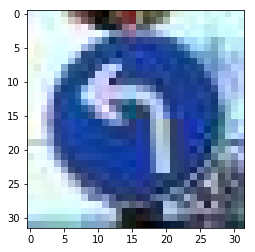

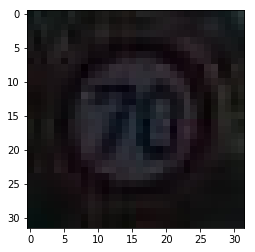

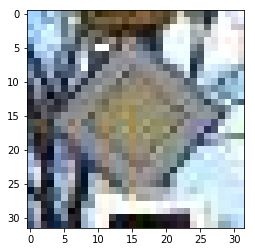

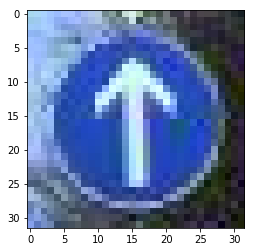

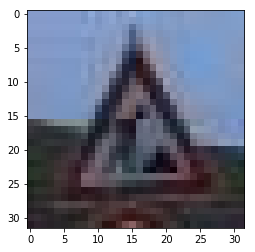

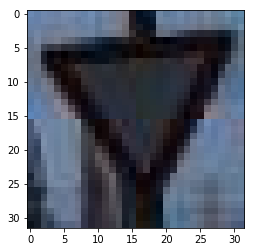

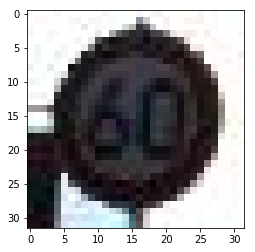

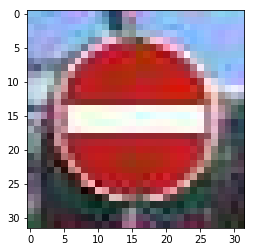

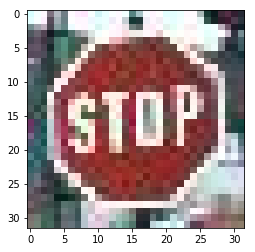

In [15]:
# Load test image 
from skimage import io
from PIL import Image
import os
os.chdir(r'/home/workspace/CarND-Traffic-Sign-Classifier-Project')


dir_1 = 'Test_image'     # original image 
dir_2 = 'Test_image_out' # resize Image


image_list = os.listdir(dir_1)
size = (32, 32)

for i in image_list:
    
    # Read Part 
    
    read_path = dir_1 + '//' + i
    read_img = Image.open(read_path)
    
    
    # Resize image to 32*32
    
    img = read_img.resize(size)
    
    # Save Part
    
    save_path = dir_2 + '//' + i
    img.save(save_path)
    

# Load resize image

image_list = os.listdir(dir_2)
test_image_set = []
for i in image_list:
    
    read_path = dir_2 + '//' + i
    #  do not use Image.open
    test_image = plt.imread(read_path)
    test_image_set.append(test_image)
    plt.imshow(test_image)
    plt.show()


In [16]:
import os
image_list = os.listdir('Test_image_out')
image_list

['3.jpg',
 '0.jpg',
 '2.jpg',
 '12.jpg',
 '1.jpg',
 '5.jpg',
 '4.jpg',
 '8.jpg',
 '11.jpg']

Pre-process the testing image

In [17]:
# List to nparray
test_image_set = np.array(test_image_set)
test_images = Pre_process(test_image_set)
print('Current image shape:',test_image_set.shape)
print('The correct set shape is: (num, 32, 32, 1)')
print('The testing set shape is:',test_images.shape)

Current image shape: (9, 32, 32, 3)
The correct set shape is: (num, 32, 32, 1)
The testing set shape is: (9, 32, 32, 1)


### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
graph = tf.Graph()
with tf.Session(graph = graph) as sess:
    model = tf.train.import_meta_graph('lenet.meta')
    model.restore(sess, 'lenet')
    model_inputs=graph.get_tensor_by_name('x:0')
    model_labels=graph.get_tensor_by_name('y:0')
    model_logits = graph.get_tensor_by_name('logits:0')
    model_accuracy = graph.get_tensor_by_name('accuracy:0')
    
    test_accuracy = sess.run(model_accuracy, feed_dict={model_inputs: X_test_1, model_labels:y_test_1})
    print('The test accuracy is :{:3f}'.format(test_accuracy))


INFO:tensorflow:Restoring parameters from lenet
The test accuracy is :0.923674


INFO:tensorflow:Restoring parameters from lenet


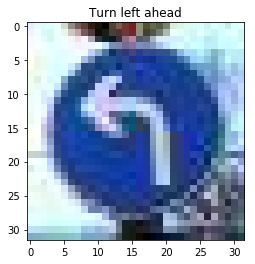

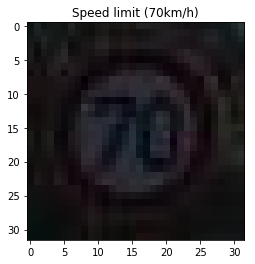

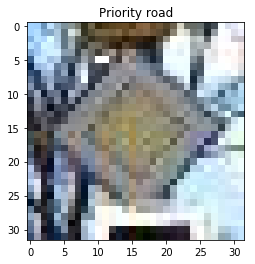

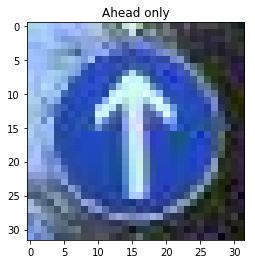

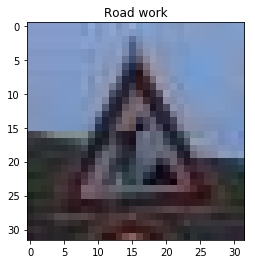

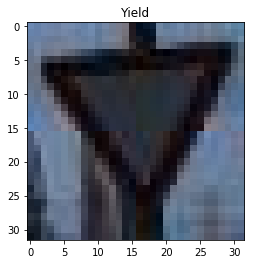

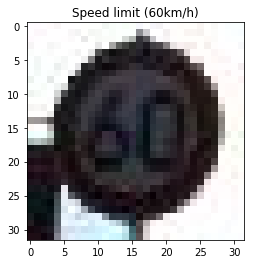

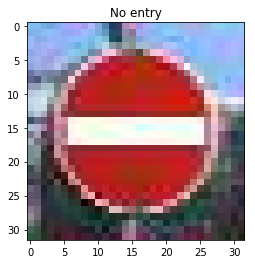

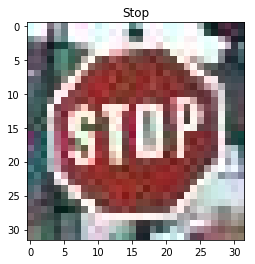

In [19]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
graph = tf.Graph()
with tf.Session(graph = graph) as sess:
    model = tf.train.import_meta_graph('lenet.meta')
    model.restore(sess, 'lenet')
    model_inputs=graph.get_tensor_by_name('x:0')
    model_logits = graph.get_tensor_by_name('logits:0')
    
    logits = sess.run(model_logits, feed_dict={model_inputs: test_images})
    
    
    pred  = np.argmax(logits, axis = 1)
    for i in range(len(test_image_set)):
        plt.title(sign_name['SignName'][pred[i]])
        plt.imshow(test_image_set[i])
        plt.show()
         
    
    

### Analyze Performance


In [20]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
#true_sign = [34, 4, 3, 12, 17, 14, 34, 4, 13]
true_sign = [34, 4, 12, 35, 25, 13, 3, 17, 14]
accuracy = sum(pred == true_sign)/len(true_sign)

print('The Accuracy of new image is: {:4f}',format(accuracy))


The Accuracy of new image is: {:4f} 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session(graph = graph) as sess:
    Top_five = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k = 5))
    for i in range(len(test_images)):
        print('The softmax probalbility of image{} prediction is:'.format(i+1))
        for j in range(5):
            print(sign_name['SignName'][Top_five.indices[i][j]],':',Top_five.values[i][j])
        print('------------------I am the divding line------------------')
        print('\n\n')





The softmax probalbility of image1 prediction is:
Turn left ahead : 0.99963
End of all speed and passing limits : 0.000152812
Right-of-way at the next intersection : 8.06289e-05
End of no passing by vehicles over 3.5 metric tons : 6.11449e-05
Ahead only : 3.21949e-05
------------------I am the divding line------------------



The softmax probalbility of image2 prediction is:
Speed limit (70km/h) : 0.905579
Speed limit (100km/h) : 0.0649568
Turn right ahead : 0.0126796
Speed limit (120km/h) : 0.00520344
Keep left : 0.00494428
------------------I am the divding line------------------



The softmax probalbility of image3 prediction is:
Priority road : 0.999994
End of no passing : 5.8005e-06
Yield : 2.78293e-10
Keep right : 1.08638e-10
Stop : 1.95181e-12
------------------I am the divding line------------------



The softmax probalbility of image4 prediction is:
Ahead only : 1.0
Traffic signals : 2.13479e-22
Priority road : 7.79657e-23
Turn right ahead : 8.85116e-24
General caution : 2.